<a href="https://colab.research.google.com/github/zakaria-grid/ML-GridPack/blob/master/ML_DNN_classifier_for_detection_fault_location_(Accuracy%2C_Pd%2C_Pmd%2C_Pfa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from google.colab import drive
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix,accuracy_score, mean_squared_error, explained_variance_score, make_scorer, mean_absolute_error, r2_score
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/GridPack_Dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/GridPack_Dataset


In [0]:
dataframe = pandas.read_csv("all_buses_bf_9_99_999_classification.csv")


dataset = dataframe.values
X = dataset[2:,1:22].astype(float)
y = dataset[2:,22]

#Split the data into trining and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Neural Network (MLP)

nn=MLPClassifier(max_iter=1000, activation='relu').fit(X_train,y_train)
nn_prediction = nn.predict(X_test)
accuracy_nn=accuracy_score(y_test,nn_prediction)
print("Accuracy (%): "+str(accuracy_nn)) 

nn_2=MLPClassifier(max_iter=1000, activation='tanh').fit(X_train,y_train)
nn_prediction2 = nn_2.predict(X_test)
accuracy_nn_2=accuracy_score(y_test,nn_prediction2)
print("Accuracy (%) "+str(accuracy_nn_2)) 

#confusion matrix and TP, FP, FN, FP


cnf_matrix = confusion_matrix(y_test, nn_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_nn = (TP+TN)/(TP+FP+FN+TN)


pmd_nn=FN/(TP+FN)

pd_nn=TP/(TP+FN)

pf_nn=FP/(FP+TN)


Accuracy (%): 0.8351073591484676
Accuracy (%) 0.7708753899798129
[0.88255977 0.89150943 0.87110789 0.77980853 0.81682028 0.86015831
 0.82685811 0.63231441 0.91666667]


In [0]:
cnf_matrix

array([[1255,    1,    2,  147,    0,    3,    4,    0,   10],
       [   0, 1323,    0,    2,    1,    1,   23,  131,    3],
       [   5,    0, 1203,    1,    0,  167,    2,    1,    2],
       [ 150,    1,    1,  896,   12,    4,    2,    0,   83],
       [  14,    7,    1,   48,  709,    8,    0,    0,   81],
       [  15,    0,   84,    0,   11,  978,   30,    5,   14],
       [   6,   15,   14,    4,    0,   29,  979,   97,   40],
       [   1,  311,    0,    0,    1,    5,   70,  724,   33],
       [  25,    4,    0,   40,    2,   13,    6,    4, 1034]])

Text(0.5, 1.0, 'Neural Network')

<Figure size 432x288 with 0 Axes>

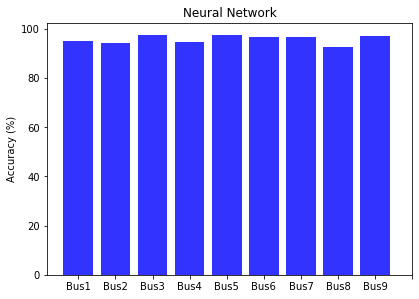

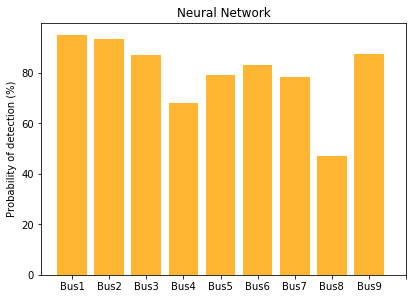

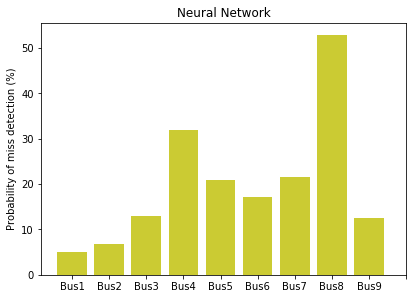

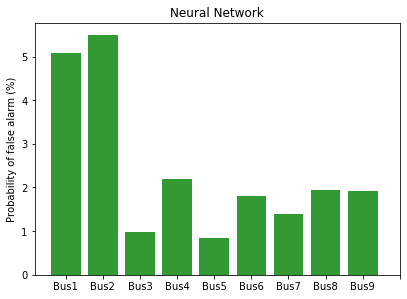

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_nn_results = [j *100 for j in ACC_nn]
pmd_nn_results=[j *100 for j in pmd_nn]
pd_nn_results=[j *100 for j in pd_nn]
pf_nn_results=[j *100 for j in pf_nn]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_nn_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_nn_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('Neural Network')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_nn_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_nn_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Neural Network')

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#prepare dataset 

prepared_y = np_utils.to_categorical(y)


#DNN 

def dnn_model():
  model = Sequential()
  model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
  model.add(Dense(50, kernel_initializer='normal', activation='relu'))
  model.add(Dense(50, kernel_initializer='normal', activation='relu'))
  model.add(Dense(50, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


estimator = KerasClassifier(build_fn=dnn_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=2, shuffle=False)
results = cross_val_score(estimator, X, prepared_y, cv=kfold)
print("DNN: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








DNN: 54.48% (0.59%)


In [0]:

model = Sequential()
model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, verbose=0)
dnn_prediction=model.predict(X_test)

In [25]:
import joblib 
import os
#Save the dnn model 
dnn_model_4 = 'dnn_model_4.sav'
joblib.dump(model, dnn_model_4)
size=os.path.getsize(dnn_model_4)
print (str(size)+" Bytes")

133477 Bytes


In [0]:
dnn_predicted=np.argmax(dnn_prediction,axis=0)
y_test_predicted=np.argmax(y_test,axis=0)

In [0]:
cnf_matrix = confusion_matrix(dnn_predicted, y_test_predicted)

In [102]:
cnf_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [103]:

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP) 
# Overall accuracy
ACC_dnn = (TP+TN)/(TP+FP+FN+TN)


pmd_dnn=FN/(TP+FN)

pd_dnn=TP/(TP+FN)

pf_dnn=FP/(FP+TN)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


ValueError: ignored

<Figure size 432x288 with 0 Axes>

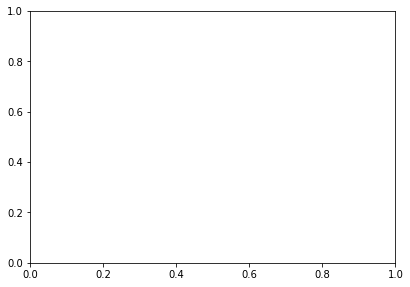

In [104]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()
ACC_dnn_results=0
pmd_dnn_results=0
pf_dnn_results=0
pd_dnn_results=0

ACC_dnn_results = [a *100 for a in ACC_dnn]
pmd_dnn_results=[b *100 for b in pmd_dnn]
pf_dnn_results=[c *100 for c in pf_dnn]
pd_dnn_results=[d *100 for d in pd_dnn]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_dnn_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Deep Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_dnn_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('Deep Neural Network')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_dnn_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Deep Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_dnn_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Deep Neural Network')

In [0]:
# training SVC classifier with an RBF kernel
svm_model = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model.predict(X_test)  
accuracy_svm=accuracy_score(y_test,svm_predictions)
print("Accuracy (%): "+str(accuracy_svm)) 

# training SVR classifier with a linear kernel
svm_model_2 = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions_2 = svm_model_2.predict(X_test)  
accuracy_svm_2=accuracy_score(y_test,svm_predictions_2)
print("Accuracy (%): "+str(accuracy_svm_2)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_svm = (TP+TN)/(TP+FP+FN+TN)


pmd_svm=FN/(TP+FN)

pd_svm=TP/(TP+FN)

pf_svm=FP/(FP+TN)


Accuracy (%): 0.29399889888052855
Accuracy (%): 0.2783079464121857


Text(0.5, 1.0, 'Support Vector Machine')

<Figure size 432x288 with 0 Axes>

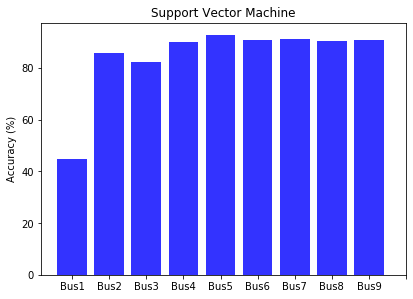

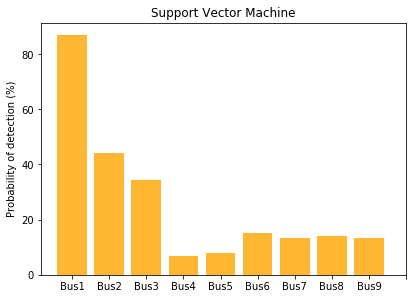

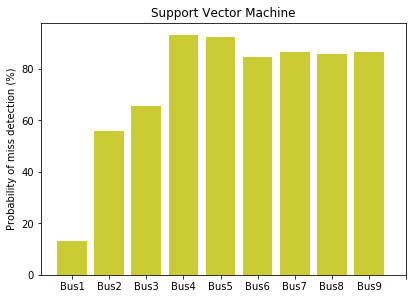

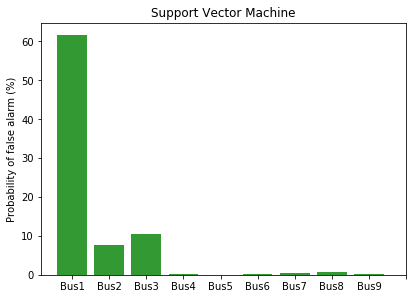

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_svm_results = [j *100 for j in ACC_svm]
pmd_svm_results=[j *100 for j in pmd_svm]
pf_svm_results=[j *100 for j in pf_svm]
pd_svm_results=[j *100 for j in pd_svm]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_svm_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Support Vector Machine')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_svm_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('Support Vector Machine')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_svm_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Support Vector Machine')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_svm_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Support Vector Machine')

In [0]:
#KNN
knn = KNeighborsClassifier().fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)  
accuracy_knn=accuracy_score(y_test,knn_predictions)
print("Accuracy (%): "+str(accuracy_knn)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_knn = (TP+TN)/(TP+FP+FN+TN)


pmd_knn=FN/(TP+FN)

pd_knn=TP/(TP+FN)

pf_knn=FP/(FP+TN)

Accuracy (%): 0.4566893007891356


Text(0.5, 1.0, 'KNN')

<Figure size 432x288 with 0 Axes>

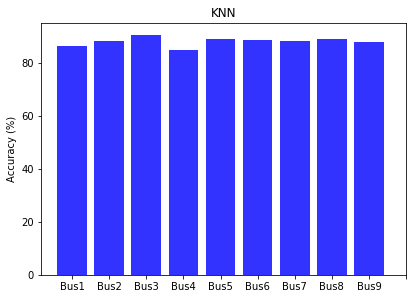

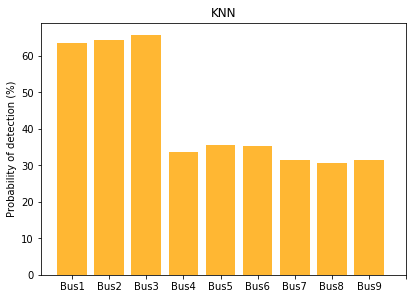

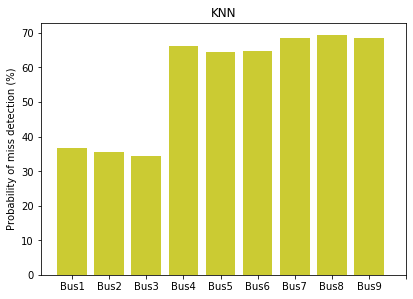

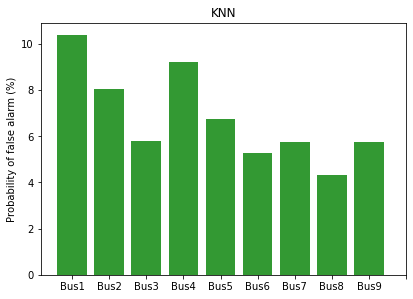

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_knn_results = [j *100 for j in ACC_knn]
pmd_knn_results=[j *100 for j in pmd_knn]
pf_knn_results=[j *100 for j in pf_knn]
pd_knn_results=[j *100 for j in pd_knn]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_knn_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('KNN')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_knn_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('KNN')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_knn_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('KNN')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_knn_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('KNN')

In [0]:
#NB
gnb =GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
accuracy_nb=accuracy_score(y_test,gnb_predictions)
print("Accuracy (%): "+str(accuracy_nb)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, gnb_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_nb = (TP+TN)/(TP+FP+FN+TN)



pmd_nb=FN/(TP+FN)

pd_nb=TP/(TP+FN)

pf_nb=FP/(FP+TN)

Accuracy (%): 0.20352358230868048


Text(0.5, 1.0, 'NB')

<Figure size 432x288 with 0 Axes>

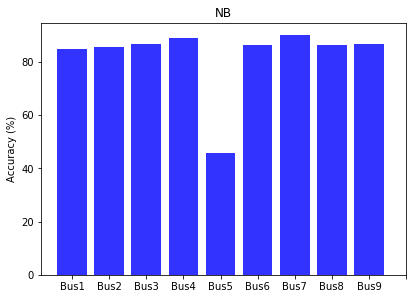

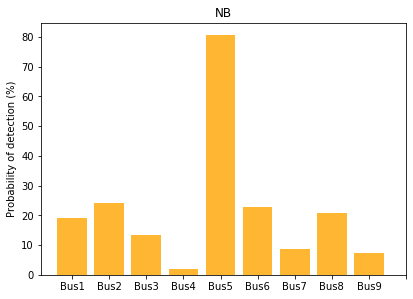

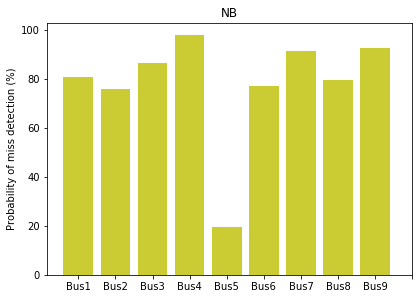

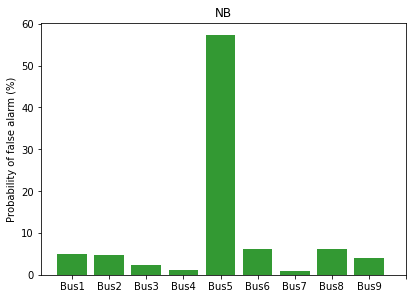

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_nb_results = [j *100 for j in ACC_nb]
pmd_nb_results=[j *100 for j in pmd_nb]
pf_nb_results=[j *100 for j in pf_nb]
pd_nb_results=[j *100 for j in pd_nb]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_nb_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('NB')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_nb_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('NB')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_nb_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('NB')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_nb_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('NB')

In [0]:

#DT
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_prediction = dtree_model.predict(X_test) 
accuracy_dt=accuracy_score(y_test,dtree_prediction)
print("Accuracy (%): "+str(accuracy_dt))

#confusion matrix
cnf_matrix = confusion_matrix(y_test, dtree_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_dt = (TP+TN)/(TP+FP+FN+TN)

pmd_dt=FN/(TP+FN)

pd_dt=TP/(TP+FN)

pf_dt=FP/(FP+TN)

Accuracy (%): 0.2542668379519178


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'DT')

<Figure size 432x288 with 0 Axes>

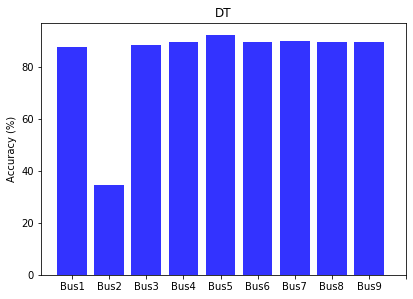

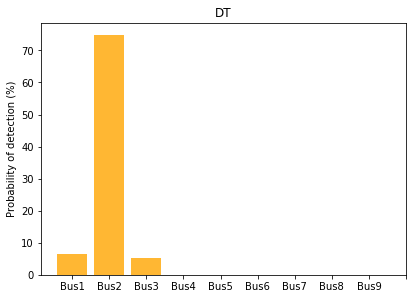

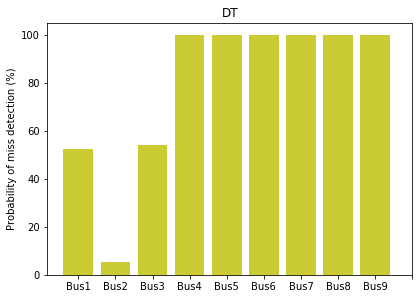

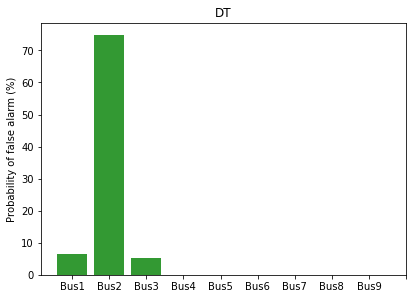

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_dt_results = [j *100 for j in ACC_dt]
pmd_dt_results=[j *100 for j in pmd_dt]
pf_dt_results=[j *100 for j in pf_dt]
pd_dt_results=[j *100 for j in pf_dt]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_dt_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('DT')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_dt_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('DT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_dt_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('DT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_dt_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('DT')

In [0]:

#RF
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,rf_prediction)
print("Accuracy (%): "+str(accuracy_rf))


#confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_rf = (TP+TN)/(TP+FP+FN+TN)

pmd_rf=FN/(TP+FN)

pd_rf=TP/(TP+FN)

pf_rf=FP/(FP+TN)


Accuracy (%): 0.8968618095063314


Text(0.5, 1.0, 'RF')

<Figure size 432x288 with 0 Axes>

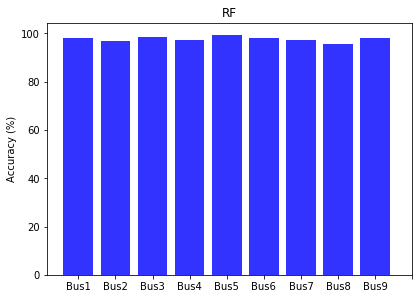

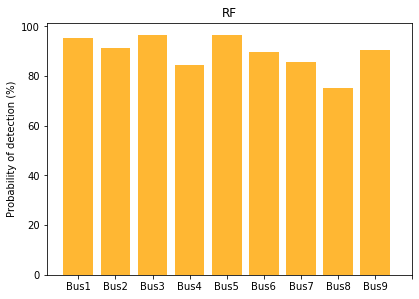

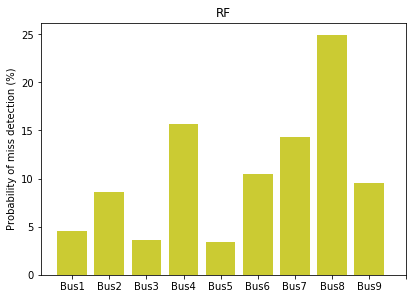

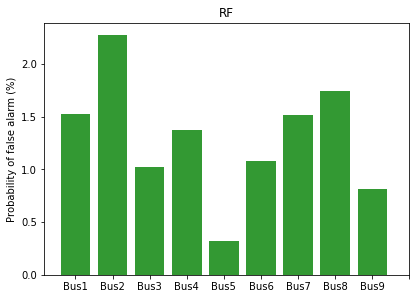

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_rf_results = [j *100 for j in ACC_rf]
pmd_rf_results=[j *100 for j in pmd_rf]
pf_rf_results=[j *100 for j in pf_rf]
pd_rf_results=[j *100 for j in pd_rf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_rf_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('RF')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_rf_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('RF')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_rf_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('RF')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_rf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('RF')

In [0]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [0]:
#HT
from skmultiflow.trees import HoeffdingTreeClassifier
ht=HoeffdingTreeClassifier()
ht.fit(X_train,y_train)
ht_prediction=ht.predict(X_test)
accuracy_ht=accuracy_score(y_test,ht_prediction)
print("Accuracy (%): "+str(accuracy_ht))


#confusion matrix
cnf_matrix = confusion_matrix(y_test, ht_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC_ht = (TP+TN)/(TP+FP+FN+TN)

pmd_ht=FN/(TP+FN)

pd_ht=TP/(TP+FN)

pf_ht=FP/(FP+TN)



Accuracy (%): 0.20352358230868048


Text(0.5, 1.0, 'HT')

<Figure size 432x288 with 0 Axes>

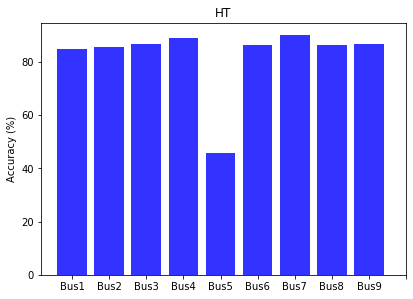

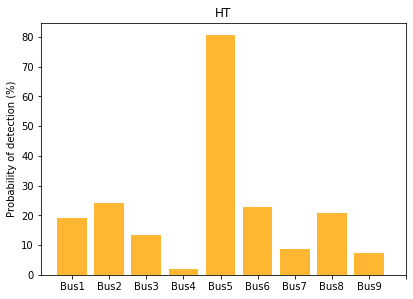

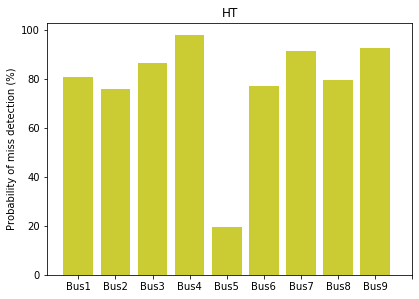

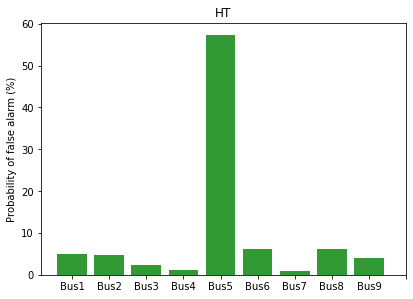

In [0]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_ht_results = [j *100 for j in ACC_ht]
pmd_ht_results=[j *100 for j in pmd_ht]
pf_ht_results=[j *100 for j in pf_ht]
pd_ht_results=[j *100 for j in pd_ht]


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, ACC_ht_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('HT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pd_ht_results, align='center', alpha=0.8, color='orange')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of detection (%)')
ax.set_title('HT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pmd_ht_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('HT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, 1)
ax.bar(y_pos, pf_ht_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('HT')